 ### Imports

In [5]:
import matplotlib.pyplot as plt
import cobra
from cobra.io import validate_sbml_model
import importlib
from xml.etree import ElementTree
import utils.Model_correction as mc
import sys
import utils.model_maj as mj
import utils.viz_utils as vu
#import cplex
import cbmpy
import pandas as pd
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go
from tqdm import tqdm
from itertools import cycle

pyparsing import

INFO: No xlwt module available, Excel spreadsheet creation disabled
CBGLPK based on swiglpk: not all methods implimented yet! 5.0

*****
Using CPLEX
*****

doFBAMinSum not available with GLPK

INFO: No xlrd module available, Excel spreadsheet reading disabled


***********************************************************************
* Welcome to CBMPy (0.8.4) - PySCeS Constraint Based Modelling        *
*                http://cbmpy.sourceforge.net                         *
* Copyright(C) Brett G. Olivier 2014 - 2020                           *
* Systems Biology Lab, Vrije Universiteit Amsterdam                   *
* Amsterdam, The Netherlands                                          *
* CBMPy is developed as part of the BeBasic MetaToolKit Project       *
* Distributed under the GNU GPL v 3.0 licence, see                    *
* LICENCE (supplied with this release) for details                    *
***********************************************************************


In [ ]:
importlib.reload(mj)
importlib.reload(vu)
importlib.reload(mc)

### Chargement des modèles

In [66]:
HepG2, errors = validate_sbml_model("../models_storage/Hep_G2_v7.xml")

In [ ]:
r = HepG2.reactions.HMR_0030
r.compartments.add("C_x")
r.boundary

In [ ]:
iHep, errors = validate_sbml_model("../models_storage/iHep_v3.xml")

In [ ]:
i = 0
for S_r in iHep.boundary :
    if S_r.bounds == (-1000.0,1000.0) :
        i+=1
    else :
        vu.print_reactions(S_r)
        print(S_r.bounds, "\n\n")
print(f"{i}/{len(iHep.boundary)}")

In [ ]:
iHep_ex = mj.maj("iHep_v2.xml", "Hep_G2_v6.xml", "../models_storage/", bounds_check = False, genes_id_copy= False, alt_gene_ids= False, metab_id_check= False, bounds_value_check= False, subsystem_copy= False,add_exchanges=False, get_names=True)

In [ ]:
iHep_ex.reactions.HMR_4281.name

In [63]:
cobra.io.write_sbml_model(HepG2, "../models_storage/Hep_G2_v7_mod.xml")

In [ ]:
# Bidouillage pour ajouter des subsystems aux réactions d'échange. (Va ajouter "exchange reactions" normalement.)
for r in HepG2.reactions :
    if "EX_" in r.id :
        m = [m_id for m_id, _ in HepG2.reactions.get_by_id(r.id).metabolites.items()]
        sub = [r.subsystem for r in m[0].reactions if "EX_" not in r.id]
        r.subsystem = sub[0]

### Bounds modifications

In [66]:
HepG2.reactions.EX_m01965x.bounds = (-565.0,-565.0) #Glucose exchange, set to the maximal input value observed with FVA
#iHep.reactions.EX_m01965x.bounds = (-1000.0, -1000.0)

In [67]:
HepG2.reactions.HMR_3883.bounds = (0.0,0.0) #Serine --> Pyruvate exchange
HepG2.reactions.EX_m02630x.bounds = (-1000.0,1000.0) #O2 exchange
HepG2.reactions.EX_m02819x.bounds = (0.0,1000.0) #Pyruvate exchange
HepG2.reactions.EX_m01910x.bounds = (0.0,0.0) #Galactose exchange
HepG2.reactions.EX_m01743x.bounds = (0.0, 1000.0) #D-Ribulose exchange
HepG2.reactions.EX_m01962x.bounds = (0.0,1000.0) #glucosamine exchange
HepG2.reactions.HMR_4316.bounds = (-1000.0,1000.0) # Glucose --> D-Glucitol
HepG2.reactions.EX_m02896x.bounds = (0.0,1000.0) # Serine intake
HepG2.reactions.EX_m01682x.bounds = (-1000.0,0.0) # Glucitol secretion blocked. Kept the intake just in case.
HepG2.reactions.EX_m01840x.bounds = (-1000.0,0.0) #Fructose exchange
#HepG2.reactions.HMR_4930.bounds = (-1000.0,1000.0) # Pyruvate transfer from cytoplasm to peroxysome
#HepG2.reactions.HMR_4281.bounds = (0.0,0.0) # Fermentation in peroxysome

In [ ]:
# ADI-PEG20 treatment

HepG2.reactions.EX_m01365x.bounds = (0.0,0.0) # Arginine intake
HepG2.reactions.HMR_3813.bounds = (0.0,0.0) # Arginosuccinate synthase

In [ ]:
#HepG2.reactions.EX_m02403x.bounds = (0.0,1000.0) #Lactate exchange
HepG2.reactions.EX_m02819x.bounds = (0.0,1000.0) #Pyruvate exchange
#HepG2.reactions.EX_m01840x.bounds = (0.0,0.0) #Fructose exchange

In [ ]:
HepG2.reactions.HMR_4281.bounds = (-1000.0,1000.0) # Pyruvate fermentation in peroxysome
HepG2.reactions.HMR_4281.name = "Lactic Fermentation"

In [ ]:
HepG2.reactions.EX_m02630x.bounds = (0.0,1000.0) #O2 exchange

In [ ]:
HepG2.reactions.EX_m02630x.bounds = (-1000.0,1000.0) #O2 exchange
HepG2.reactions.EX_m02819x.bounds = (0.0,1000.0) #Pyruvate exchange
HepG2.reactions.EX_m01910x.bounds = (0.0,0.0) #Galactose exchange
HepG2.reactions.EX_m01743x.bounds = (0.0, 1000.0) #D-Ribulose exchange
HepG2.reactions.EX_m01962x.bounds = (0.0,1000.0) #glucosamine exchange
#HepG2.reactions.EX_m01965x.bounds = (-1000,1000.0) #Glucose exchange
#HepG2.reactions.EX_m01286x.bounds = (0.0,0.0) #ADP-Glucose exchange
#HepG2.reactions.EX_m01840x.bounds = (-1000.0,0.0) #Fructose exchange
#HepG2.reactions.EX_m01743x.bounds = (-1000.0,1000.0) #D-Ribulose exchange
#HepG2.reactions.EX_m02453x.bounds = (0.0,0.0) #Mannose exchange
#HepG2.reactions.EX_m02470x.bounds = (0.0,0.0) #Methanol exchange

# --> After Methanol cut, Glucose uptake flux went from 0.0 to -190.0
# Without O2, glucose uptake went down to -23

### Optimization

In [ ]:
iHep.objective = "biomass_components"
sol = iHep.optimize()
sol

In [21]:
HepG2.objective = "biomass_components"
val = HepG2.optimize()
val.objective_value

27.150400483557483

### See exchanges

In [ ]:
[(m.name, m.id) for m in HepG2.reactions.biomass_components.metabolites]

In [ ]:
importlib.reload(vu)
vu.print_exchanges(HepG2, filter = "all")

### run_parcours

In [ ]:
vu.run_parcours(HepG2.reactions.EX_m01965x, HepG2)

#m01682c glucitol

### see parcours

In [ ]:
for reaction, flux in f.items() :
    vu.print_reactions(HepG2.reactions.get_by_id(reaction), flux)
    print(f"FLUX : {flux} --- ID : {HepG2.reactions.get_by_id(reaction).id} --- compartment : {HepG2.reactions.get_by_id(reaction).compartments} \n\n---\n\n")

In [ ]:
vu.print_reactions(HepG2.reactions.biomass_components)

### FVA

In [40]:
from cobra.flux_analysis import flux_variability_analysis

In [68]:
fva = flux_variability_analysis(HepG2)

In [67]:
HepG2.objective = "biomass_components"

In [ ]:
indispensable = []
unisens = []
reversible = []
unknown = []
other = []

for reaction_id, flux_values in fva.iterrows() :
    min_flux = flux_values["minimum"]
    max_flux = flux_values["maximum"]
    difference = abs(max_flux - min_flux)

    if max_flux > 0.0 and min_flux > 0.0 :
        f = max_flux
    elif max_flux > 0.0 and min_flux < 0.0 :
        f = 0.0
    elif max_flux < 0.0 and min_flux < 0.0 :
        f = min_flux
    else :
        f = 0.0


    if difference < 1e-9 and min_flux + max_flux != 0.0 and abs(min_flux + max_flux) > 0.01 :
       indispensable.append((reaction_id, flux_values, f))

    elif min_flux < 0.0 and max_flux > 0.0 :
        reversible.append((reaction_id, flux_values, f))

    elif min_flux > 0.0 and max_flux > 0.0 or min_flux < 0.0 and max_flux < 0.0 :
        if difference > 1e-9 :
            unisens.append((reaction_id, flux_values, f))
    elif min_flux == max_flux == 0.0 :
        unknown.append((reaction_id, flux_values, f))
    else :
        other.append((reaction_id, flux_values, f))

print("\n--------INDISPENSABLE--------\n") 
for reaction_id, flux_values, f in indispensable : 
    min_flux = flux_values["minimum"]
    max_flux = flux_values["maximum"]   
    vu.print_reactions(HepG2.reactions.get_by_id(reaction_id), f)
    print(f"\nMIN FLUX -- {min_flux} === {max_flux} -- MAX FLUX")
    print(f"\nID : {reaction_id} -- NAME : {HepG2.reactions.get_by_id(reaction_id).name}\n\n")

print("\n--------UNISENS--------\n")
for reaction_id, flux_values, f in unisens :    
    min_flux = flux_values["minimum"]
    max_flux = flux_values["maximum"]
    vu.print_reactions(HepG2.reactions.get_by_id(reaction_id), f)
    print(f"\nMIN FLUX -- {min_flux} === {max_flux} -- MAX FLUX")
    print(f"\nID : {reaction_id} -- NAME : {HepG2.reactions.get_by_id(reaction_id).name}\n\n")

print("\n--------REVERSIBLE--------\n")
for reaction_id, flux_values, f in reversible :  
    min_flux = flux_values["minimum"]
    max_flux = flux_values["maximum"]  
    vu.print_reactions(HepG2.reactions.get_by_id(reaction_id), f)
    print(f"\nMIN FLUX -- {min_flux} === {max_flux} -- MAX FLUX")
    print(f"\nID : {reaction_id} -- NAME : {HepG2.reactions.get_by_id(reaction_id).name}\n\n")

if len(unknown) >0 :
    print("\n--------UNKNOWN--------\n")
    for reaction_id, flux_values, f in unknown :    
        min_flux = flux_values["minimum"]
        max_flux = flux_values["maximum"]
        vu.print_reactions(HepG2.reactions.get_by_id(reaction_id), f)
        print(f"\nMIN FLUX -- {min_flux} === {max_flux} -- MAX FLUX")
        print(f"\nID : {reaction_id} -- NAME : {HepG2.reactions.get_by_id(reaction_id).name}\n\n")

if len(other) >0 :
    print("\n--------OTHER--------\n")
    for reaction_id, flux_values, f in other :    
        min_flux = flux_values["minimum"]
        max_flux = flux_values["maximum"]
        vu.print_reactions(HepG2.reactions.get_by_id(reaction_id), f)
        print(f"\nMIN FLUX -- {min_flux} === {max_flux} -- MAX FLUX")
        print(f"\nID : {reaction_id} -- NAME : {HepG2.reactions.get_by_id(reaction_id).name}\n\n")

In [69]:
def cut_and_optimize(model:cobra.core.model.Model, reaction_id:str, objective:str = "biomass_components") :
    reaction_to_cut = model.reactions.get_by_id(reaction_id)
    original_bounds = reaction_to_cut.bounds
    reaction_to_cut.bounds = (0.0,0.0)

    model.objective = objective
    solution = model.optimize()
    objective_value = solution.objective_value

    if objective_value:
        return objective_value
    else :
        reaction_to_cut.bounds = original_bounds # Backtrack if no solution is found
    
    

In [70]:
values = []
reactions_cut = []
for reaction_id, flux_values in fva.iterrows() :
    min_flux = flux_values["minimum"]
    max_flux = flux_values["maximum"]
    if max_flux == 0.0 and min_flux == 0.0 :
        pass
    elif max_flux == 0.0 or min_flux == 0.0 :
        val = cut_and_optimize(HepG2, reaction_id)
        if val == None :
            values.append(0.0)
        else :
            values.append(val)
        reactions_cut.append(reaction_id)
        
    else :
        pass

In [81]:


for value, id in zip(values, x) :
    if value == 0.0 and id < 1200 :
        print(HepG2.reactions.get_by_id(reactions_cut[id]).name)

galactose-1-phosphate uridylyltransferase
thioredoxin
deoxycytidine kinase
uridine-cytidine kinase 1
adenosine deaminase
thymidine kinase 1
thioredoxin reductase 3
carbonic anhydrase 5B
branched chain amino acid transaminase 2
branched chain keto acid dehydrogenase E1 subunit alpha
methylcrotonyl-CoA carboxylase subunit 2
AU RNA binding methylglutaconyl-CoA hydratase
acetyl-CoA acyltransferase 1
acetyl-CoA acyltransferase 1
glycerol-3-phosphate dehydrogenase 1
cytochrome P450 family 27 subfamily A member 1
cytochrome P450 family 27 subfamily A member 1
cytochrome P450 family 27 subfamily A member 1


In [71]:
x = [i for i in range(len(values))]

/tmp/ipykernel_17635/2315745455.py:5: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


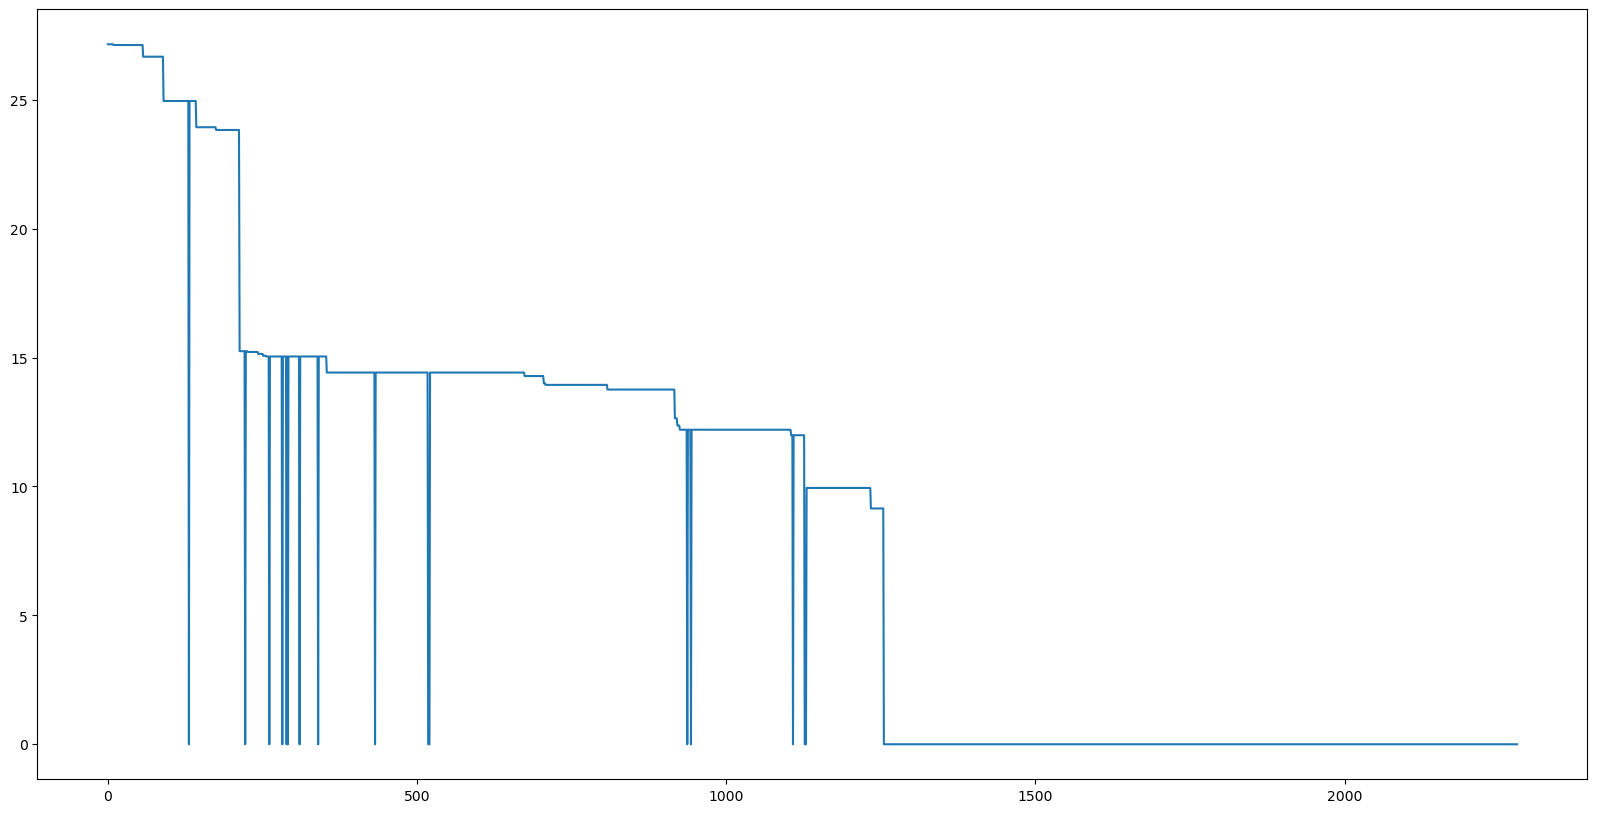

In [72]:
plt.rcParams["figure.figsize"] = (20,10)
fig, ax = plt.subplots()

ax.plot(x, values)
fig.show()

In [ ]:
unknown_ids = [i[0] for i in unknown]

for id in unknown_ids :
    r_to_change = HepG2.reactions.get_by_id(id)
    r_to_change.bounds=(0.0,0.0)
    print(f"\nchanged {id}'s bounds")

In [49]:
with open("zero_reactions.txt", "w") as out :
    for id in unknown_ids :
        out.write(f"{id}\n")

In [ ]:
for r in HepG2.reactions :
    if len(r.name) > 1 :
        print(r.name)

### Visualisation

In [ ]:
df_Ci, df_Ri, df_Si, df_Mi, df_Pi, df_Xi, df_Li, df_Gi, df_Ni = vu.build_reaction_df(iHep)
df_C, df_R, df_S, df_M, df_P, df_X, df_L, df_G, df_N = vu.build_reaction_df(HepG2)

In [ ]:
flux_filter = 0.0

In [ ]:
cols = ['#E48F72','#FC6955','#7E7DCD','#BC7196','#86CE00','#E3EE9E','#22FFA7','#FF0092','#C9FBE5','#B68E00','#00B5F7','#6E899C','#D626FF','#AF0038',
 '#0D2A63',
 '#6C4516',
 '#DA60CA',
 '#1616A7',
 '#620042',
 '#A777F1',
 '#862A16',
 '#778AAE',
 '#6C7C32',
 '#B2828D',
 '#FC0080',
 '#FB00D1',
 '#00A08B',
 '#511CFB',
 '#EB663B',
 '#750D86',
 '#B68100',
 '#222A2A',
 '#DA16FF',
 '#FB0D0D',
 '#1CA71C',
 '#E15F99',
 '#2E91E5','#DC587D','#EEA6FB','#479B55','#FF9616','#F6F926','#0DF9FF','#FE00CE','#FED4C4','#6A76FC','#00FE35','#FD3216','#2E91E5','#E15F99','#1CA71C','#FB0D0D','#DA16FF','#222A2A','#B68100','#750D86','#EB663B','#511CFB','#00A08B','#FB00D1','#FC0080','#B2828D','#6C7C32','#778AAE','#862A16','#A777F1','#620042','#1616A7','#DA60CA','#6C4516','#0D2A63','#AF0038']

In [ ]:
len(cols)

In [ ]:
subsystems = set()
for r in iHep.reactions :
    if len(r.subsystem) >0  :
        subsystems.add(r.subsystem)

In [ ]:
cmap = {}
for sub, col in zip(subsystems, cycle(set(cols))) :
    cmap[sub] = col

In [ ]:
fig = px.treemap(df_Ci.loc[(df_Ci["flux"] >= flux_filter) & (df_Ci["name"] != "Null")].to_dict() , path=['subSystem', 'id'], 
                 values='flux', hover_name= "name" ,color='subSystem',color_discrete_map=cmap)

fig.update_layout(title_text="Cytoplasm reactions -- <b>HEALTHY MODEL<br />", font_size=12)
fig.show(renderer='notebook')

In [ ]:
 
fig = px.treemap(df_C.loc[(df_C["flux"] >= flux_filter) & (df_C["name"] != "Null")].to_dict() , path=['subSystem', 'id'], 
                 values='flux', hover_name = "name", color='subSystem',color_discrete_map=cmap)

fig.update_layout(title_text="Cytoplasm reactions -- <b>CANCER MODEL<br />", font_size=12)
fig.show(renderer='notebook')

In [ ]:
fig = px.treemap(df_R.loc[(df_R["flux"] >= flux_filter) & (df_R["name"] != "Null")], path=['subSystem', 'name'], 
                 values='flux', color='subSystem',color_discrete_sequence=px.colors.qualitative.Light24_r)
fig.update_layout(title_text="Endoplasmic Reticulum reactions", font_size=12)
fig.show(renderer='notebook')

In [ ]:
fig = px.treemap(df_S.loc[(df_S["flux"] >= flux_filter) & (df_S["name"] != "Null")], path= ['subSystem', 'name'], 
                 values='flux', color='subSystem',color_discrete_sequence=px.colors.qualitative.Light24_r)
fig.update_layout(title_text="Endomembraneous reactions", font_size=12)
fig.show(renderer='notebook')

In [ ]:
fig = px.treemap(df_Mi.loc[(df_Mi["flux"] >= flux_filter) & (df_Mi["name"] != "Null")], path= [px.Constant("Mitochondria"),'subSystem', 'name'], 
                 values='flux',hover_name = "name", color='subSystem',color_discrete_map=cmap)
fig.update_layout(title_text="Mitochondrial reactions -- <b>HEALTHY MODEL<br />", font_size=12)
fig.show(renderer='notebook')

In [ ]:
fig = px.treemap(df_M.loc[(df_M["flux"] >= flux_filter) & (df_M["name"] != "Null")], path= [px.Constant("Mitochondria"),'subSystem', 'name'], 
                 values='flux', hover_name = "name", color='subSystem',color_discrete_map=cmap)
fig.update_layout(title_text="Mitochondrial reactions -- <b>CANCER MODEL<br />", font_size=12)
fig.show(renderer='notebook')

In [ ]:
fig = px.treemap(df_Pi.loc[(df_Pi["flux"] >= flux_filter) & (df_Pi["name"] != "Null")], path= [px.Constant("Peroxysome"),'subSystem', 'name'], 
                 values='flux', hover_name = "name", color='subSystem',color_discrete_map=cmap)
fig.update_layout(title_text="Peroxysomal reactions -- <b>HEALTHY MODEL<br />", font_size=12)
fig.show(renderer='notebook')

In [ ]:
fig = px.treemap(df_P.loc[(df_P["flux"] >= flux_filter) & (df_P["name"] != "Null")], path= [px.Constant("Peroxysome"),'subSystem', 'name'], 
                 values='flux', hover_name="name", color='subSystem',color_discrete_map=cmap)
fig.update_layout(title_text="Peroxysomal reactions -- <b>CANCER MODEL<br />", font_size=12)
fig.show(renderer='notebook')

In [ ]:
fig = px.treemap(df_X.loc[(df_X["flux"] >= flux_filter) & (df_X["name"] != "Null")], path= ['subSystem', 'name'], 
                 values='flux', color='subSystem',color_discrete_sequence=px.colors.qualitative.Light24_r)
fig.update_layout(title_text="Exchange reactions", font_size=12)
fig.show(renderer='notebook')

### Tests

In [ ]:
def get_exchanges_reactions(target_model) :
    Ex_reactions_to_add = []
    target_model.compartments["C_x"] = "C_x"
    for C_s_reaction in tqdm(target_model.boundary) :
        if len(C_s_reaction.products) == 0 :
            if len(C_s_reaction.reactants) == 1 :
                
                # Création du métabolite externe
                x_metabolite_id = C_s_reaction.reactants[0].id[:-1] + "x" # Creating external metabolite ID
                x_metabolite = C_s_reaction.reactants[0].copy()
                x_metabolite.id = x_metabolite_id
                target_model.add_metabolites([ \
                    cobra.core.metabolite.Metabolite( \
                    x_metabolite_id, \
                    name=x_metabolite_id, \
                    compartment='C_x')])
                
                # Création de la réaction externe.
                C_x_reaction_id = C_s_reaction.id = "EX_" + x_metabolite_id  # Copying C_s reaction to make it an EX_ reaction

                # Ajout du métabolite externe à la réaction S
                C_s_reaction.add_metabolites({x_metabolite : 1.0})
                
                # Ajout du métabolite externe à la réaction X, et enlèvement du métabolite S.
                try :
                    C_x_reaction = target_model.add_boundary(x_metabolite, type="exchange",reaction_id=C_x_reaction_id, lb=0.0, ub=1000.0,sbo_term="SBO:0000627")
                    Ex_reactions_to_add.append(C_x_reaction)
                except ValueError :
                    continue
        elif len(C_s_reaction.reactants) == 0 :
            if len(C_s_reaction.products) == 1 :
                # Création du métabolite externe
                x_metabolite_id = C_s_reaction.products[0].id[:-1] + "x"
                x_metabolite = C_s_reaction.products[0].copy()
                x_metabolite.id = x_metabolite_id
                target_model.add_metabolites([ \
                    cobra.core.metabolite.Metabolite( \
                    x_metabolite_id, \
                    name=x_metabolite_id, \
                    compartment='C_x')])
                
                # Création de la réaction externe.
                C_x_reaction_id = C_s_reaction.id = "EX_" + x_metabolite_id


                C_s_reaction.add_metabolites({x_metabolite : -1.0})
                try:
                    C_x_reaction = target_model.add_boundary(x_metabolite, type="exchange",reaction_id=C_x_reaction_id, lb=-1000.0, ub=0.0,sbo_term="SBO:0000627")
                    Ex_reactions_to_add.append(C_x_reaction)
                except ValueError :
                    continue
        else :
            pass
    target_model.add_reactions(Ex_reactions_to_add)

In [ ]:
iHep_to_fix, errors = cobra.io.validate_sbml_model("../models_storage/iHepatocytes2322_Cobra.xml")

In [ ]:
help(cobra.core.reaction.Reaction)

438 boundary reactions originally

In [ ]:
boundary_reactions = iHep_to_fix.boundary
reactions_to_add = []
for b_r in boundary_reactions :
    for metab, sto in b_r.metabolites.items() :
        # Creating boundary metabolite
        lb = b_r.lower_bound
        ub = b_r.upper_bound
        new_metab_x = cobra.core.metabolite.Metabolite(metab.id[:-1]+"x", name = metab.id[:-1]+"x", compartment = "C_x")
        if sto > 0.0 :
            b_r.add_metabolites({new_metab_x: -1.0}) # Intake

        else :
            b_r.add_metabolites({new_metab_x : 1.0}) # Secretion
        new_reaction_x = cobra.core.reaction.Reaction(id = "EX_" + new_metab_x.id, name = "EX_" + new_metab_x.id, subsystem= "Exchange reactions", lower_bound= lb, upper_bound = ub)
        new_reaction_x.add_metabolites({new_metab_x : 1.0})
        reactions_to_add.append(new_reaction_x)
iHep_to_fix.add_reactions(reactions_to_add)


In [ ]:
cobra.io.write_sbml_model(iHep_to_fix, "../models_storage/iHep_v2.xml")

In [ ]:
len(HepG2.boundary)

In [ ]:
list(rtest.genes)[0].id